In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('data/MBTA_Monthly_Ridership_By_Mode.csv')

data["service_date"] = pd.to_datetime(data["service_date"])
data.set_index("service_date", inplace=True)
# data.index = pd.to_datetime(data["service_date"])
data = data.dropna(
    subset=[
        "total_monthly_ridership",
        "average_monthly_ridership",
        "total_monthly_weekday_ridership",
        "average_monthly_weekday_ridersh",
    ]
)
data = data[(data["mode"] == "Rail") & (data["route_or_line"] == "Red Line")]
data["total_monthly_ridership"] = data["total_monthly_ridership"].astype(int)
data["average_monthly_ridership"] = data["average_monthly_ridership"].astype(int)
data["average_monthly_weekday_ridersh"] = data["average_monthly_weekday_ridersh"].astype(int)
data["total_monthly_weekday_ridership"] = data[
    "total_monthly_weekday_ridership"
].astype(int)


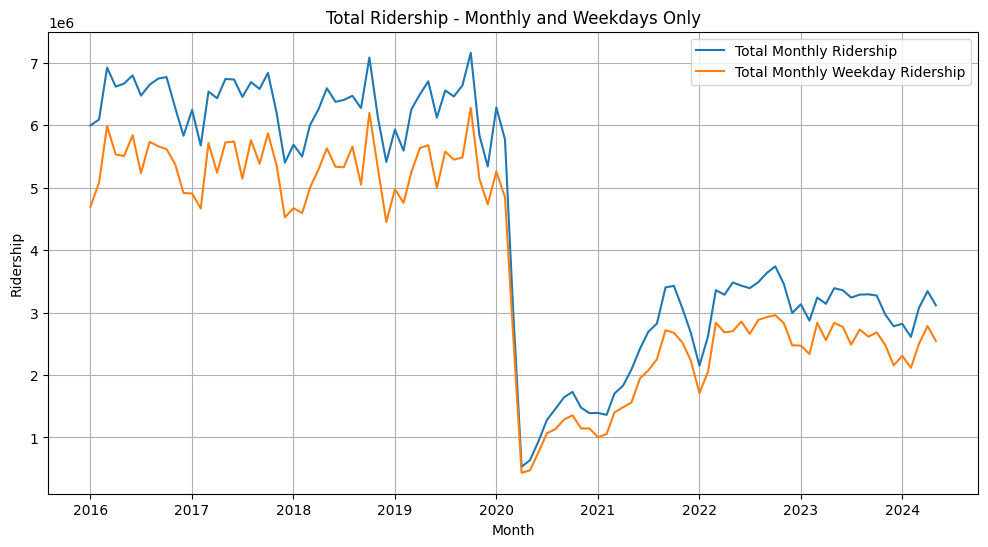

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=data,
    x=data.index,
    y="total_monthly_ridership",
    label="Total Monthly Ridership",
)
sns.lineplot(
    data=data,
    x=data.index,
    y="total_monthly_weekday_ridership",
    label="Total Monthly Weekday Ridership",
)
plt.title("Total Ridership - Monthly and Weekdays Only")
plt.xlabel('Month')
plt.ylabel('Ridership')
plt.legend()
plt.grid(True)
plt.show()